# `Importing the needed Libraries`

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import datetime as dt
from datetime import date
import pandas as pd

# _`Loading of the raw dataset`_

In [4]:
df = pd.read_csv(r"C:\Users\user\Desktop\retail banking_02\raw_data\bank_data_C.csv")

In [5]:
# viewing the first 5 records of the raw dataset
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


## `Checking the original shape of the dataset`

In [7]:
df.shape

(1041614, 9)

_This indicates that the DataFrame named `df` contains:_
- **1,041,614 rows**
- **9 columns**

---

## Checking for missing values, the variable data types, and the number columns in the dataset

In [10]:
df.isna().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

_This shows that there are no missing values in the dataset._

---

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 71.5+ MB


### Data Quality Overview

All columns contain 1,041,614 entries, indicating that there are no missing values in the dataset. However, the `CustomerDOB` and `TransactionDate` columns appear to have incorrect data types. These should be corrected to ensure proper handling and analysis of date-related information.

---

In [14]:
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

C:\Users\user\AppData\Local\Temp\ipykernel_13916\560733132.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])
C:\Users\user\AppData\Local\Temp\ipykernel_13916\560733132.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1041614 non-null  object        
 1   CustomerID               1041614 non-null  object        
 2   CustomerDOB              1041614 non-null  datetime64[ns]
 3   CustGender               1041614 non-null  object        
 4   CustLocation             1041614 non-null  object        
 5   CustAccountBalance       1041614 non-null  float64       
 6   TransactionDate          1041614 non-null  datetime64[ns]
 7   TransactionTime          1041614 non-null  int64         
 8   TransactionAmount (INR)  1041614 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 71.5+ MB


_Both **CustomerDOB** and **TransactionDate** has now been converted to an appropriate datatype_

---

In [17]:
# Convert to datetime object and format it
df['TransactionTime'] = df['TransactionTime'].apply(
    lambda x: datetime.strptime(str(x).zfill(6), "%H%M%S").strftime("%H:%M:%S"))

### Calculating Age from Date of Birth with a feature en

The following code computes the age of each customer based on their date of birth:

In [19]:
today = date.today()
formatted_date = today.strftime("%Y-%m-%d")
formatted_date = pd.to_datetime(formatted_date)
df['Age'] = (formatted_date - df['CustomerDOB']).dt.days // 365

### Removing Age Outliers

**_The following line of code removes rows from the dataset where the `Age` is either below 18 or above 110:_**

In [21]:
df.drop(df[(df['Age'] < 18) | (df['Age'] > 110)].index, inplace=True)

### Dataset Dimensions

In [23]:
df.shape  # This command returns the shape of the DataFrame:

(880345, 10)

### Checking for Duplicate Records:

In [25]:
df.duplicated().sum()  # This command counts the number of duplicate rows in the dataset:

0

In [26]:
df.shape

(880345, 10)

In [27]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0,31
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0,28
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5,37
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,17:38:06,566.0,33
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2016-02-08,17:05:37,148.0,43


## Extracting days, months, and years from the `CustDOB` and `TransactionDate`

In [29]:
df['CustomerBD'] = df['CustomerDOB'].dt.day
df['CustomerBM'] = df['CustomerDOB'].dt.month
df['CustomerBY'] = df['CustomerDOB'].dt.year

df['TransactionDay'] = df['TransactionDate'].dt.day
df['TransactionMonth'] = df['TransactionDate'].dt.month
df['TransactionYear'] = df['TransactionDate'].dt.year

In [30]:
df.drop(columns=['CustomerDOB','TransactionDate'], inplace=True, axis=1)

In [31]:
df.head()

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR),Age,CustomerBD,CustomerBM,CustomerBY,TransactionDay,TransactionMonth,TransactionYear
0,T1,C5841053,F,JAMSHEDPUR,17819.05,14:32:07,25.0,31,1,10,1994,8,2,2016
2,T3,C4417068,F,MUMBAI,17874.44,14:27:12,459.0,28,26,11,1996,8,2,2016
4,T5,C9031234,F,NAVI MUMBAI,6714.43,18:11:56,1762.5,37,24,3,1988,8,2,2016
6,T7,C7126560,F,MUMBAI,973.46,17:38:06,566.0,33,26,1,1992,8,2,2016
7,T8,C1220223,M,MUMBAI,95075.54,17:05:37,148.0,43,27,1,1982,8,2,2016


In [32]:
df.describe(include='all')

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR),Age,CustomerBD,CustomerBM,CustomerBY,TransactionDay,TransactionMonth,TransactionYear
count,880345,880345,880345,880345,8.803450e+05,880345,8.803450e+05,880345.000000,880345.000000,880345.000000,880345.000000,880345.000000,880345.000000,880345.0
unique,880345,761832,2,7493,NaN,80720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,T1,C6222360,M,MUMBAI,NaN,20:32:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,6,636215,86339,NaN,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,7.702449e+04,NaN,1.270698e+03,37.526539,15.018276,6.462988,1987.286916,14.367757,7.340737,2016.0
std,NaN,NaN,NaN,NaN,3.525295e+05,NaN,5.404438e+03,5.167822,8.798732,3.458968,5.158323,7.273518,2.641618,0.0
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,18.000000,1.000000,1.000000,1975.000000,8.000000,1.000000,2016.0
25%,NaN,NaN,NaN,NaN,4.204130e+03,NaN,1.460000e+02,34.000000,7.000000,3.000000,1984.000000,8.000000,6.000000,2016.0
50%,NaN,NaN,NaN,NaN,1.447911e+04,NaN,3.950000e+02,37.000000,15.000000,7.000000,1988.000000,9.000000,8.000000,2016.0
75%,NaN,NaN,NaN,NaN,4.630067e+04,NaN,1.000000e+03,41.000000,22.000000,9.000000,1991.000000,20.000000,9.000000,2016.0


In [33]:
X = df.copy()

In [34]:
X.head(2)

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR),Age,CustomerBD,CustomerBM,CustomerBY,TransactionDay,TransactionMonth,TransactionYear
0,T1,C5841053,F,JAMSHEDPUR,17819.05,14:32:07,25.0,31,1,10,1994,8,2,2016
2,T3,C4417068,F,MUMBAI,17874.44,14:27:12,459.0,28,26,11,1996,8,2,2016


In [35]:
X.shape

(880345, 14)

## Dropping the irrelevant columns

In [37]:
X.drop(columns=['TransactionID', 'CustomerID'], inplace=True, axis=1)

In [38]:
X.shape

(880345, 12)

In [39]:
X.head(2)

,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR),Age,CustomerBD,CustomerBM,CustomerBY,TransactionDay,TransactionMonth,TransactionYear
0,F,JAMSHEDPUR,17819.05,14:32:07,25.0,31,1,10,1994,8,2,2016
2,F,MUMBAI,17874.44,14:27:12,459.0,28,26,11,1996,8,2,2016


## Encoding

In [41]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [42]:
X['CustGender'] = pd.get_dummies(X['CustGender'], drop_first=True, dtype=int)

In [43]:
X['CustGender'].value_counts()

CustGender
1    636215
0    244130
Name: count, dtype: int64

In [44]:
l_encoder = LabelEncoder()

In [45]:
X['CustLocation'] = l_encoder.fit_transform(X['CustLocation'])

In [46]:
X['TransactionTime'] = l_encoder.fit_transform(X['TransactionTime'])

In [47]:
X.head()

,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR),Age,CustomerBD,CustomerBM,CustomerBY,TransactionDay,TransactionMonth,TransactionYear
0,0,2865,17819.05,46650,25.0,31,1,10,1994,8,2,2016
2,0,4250,17874.44,46355,459.0,28,26,11,1996,8,2,2016
4,0,4563,6714.43,59839,1762.5,37,24,3,1988,8,2,2016
6,0,4250,973.46,57809,566.0,33,26,1,1992,8,2,2016
7,1,4250,95075.54,55860,148.0,43,27,1,1982,8,2,2016


## Scaling

In [49]:
X.columns

Index(['CustGender', 'CustLocation', 'CustAccountBalance', 'TransactionTime',
       'TransactionAmount (INR)', 'Age', 'CustomerBD', 'CustomerBM',
       'CustomerBY', 'TransactionDay', 'TransactionMonth', 'TransactionYear'],
      dtype='object')

In [50]:
col_to_scale = ['CustAccountBalance', 'TransactionAmount (INR)','Age' ]

In [51]:
# fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(4,2))
# ax=ax.flatten()
# for idx, col in enumerate(col_to_scale):
#    sns.histplot(X[col], ax=ax[idx], color='teal', kde=True)
#    ax[idx].set_title(f'Histogram for: {col}')
# plt.tight_layout()
# plt.show()

In [52]:
X.describe()

,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR),Age,CustomerBD,CustomerBM,CustomerBY,TransactionDay,TransactionMonth,TransactionYear
count,880345.000000,880345.000000,8.803450e+05,880345.000000,8.803450e+05,880345.000000,880345.000000,880345.000000,880345.000000,880345.000000,880345.000000,880345.0
mean,0.722688,3302.806235,7.702449e+04,52005.065277,1.270698e+03,37.526539,15.018276,6.462988,1987.286916,14.367757,7.340737,2016.0
std,0.447672,1912.327222,3.525295e+05,18067.403107,5.404438e+03,5.167822,8.798732,3.458968,5.158323,7.273518,2.641618,0.0
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,18.000000,1.000000,1.000000,1975.000000,8.000000,1.000000,2016.0
25%,0.000000,1666.000000,4.204130e+03,40107.000000,1.460000e+02,34.000000,7.000000,3.000000,1984.000000,8.000000,6.000000,2016.0
50%,1.000000,3210.000000,1.447911e+04,54919.000000,3.950000e+02,37.000000,15.000000,7.000000,1988.000000,9.000000,8.000000,2016.0
75%,1.000000,4653.000000,4.630067e+04,66623.000000,1.000000e+03,41.000000,22.000000,9.000000,1991.000000,20.000000,9.000000,2016.0
max,1.000000,7492.000000,4.316556e+07,80719.000000,1.560035e+06,50.000000,31.000000,12.000000,2007.000000,31.000000,12.000000,2016.0


In [53]:
from sklearn.preprocessing import RobustScaler

In [54]:
s_scaler = RobustScaler()

In [55]:
X[col_to_scale] = s_scaler.fit_transform(X[col_to_scale])

In [56]:
X.head()

,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR),Age,CustomerBD,CustomerBM,CustomerBY,TransactionDay,TransactionMonth,TransactionYear
0,0,2865,0.079340,46650,-0.433255,-0.857143,1,10,1994,8,2,2016
2,0,4250,0.080656,46355,0.074941,-1.285714,26,11,1996,8,2,2016
4,0,4563,-0.184449,59839,1.601288,0.000000,24,3,1988,8,2,2016
6,0,4250,-0.320826,57809,0.200234,-0.571429,26,1,1992,8,2,2016
7,1,4250,1.914562,55860,-0.289227,0.857143,27,1,1982,8,2,2016


### 🧠 Deploying K-Means Clustering Algorithm

**K-Means** is an **unsupervised machine learning algorithm** used to group data into a predefined number of clusters (**K**).  
It identifies patterns in unlabeled data by minimizing the distance between data points and their assigned cluster centers (called **centroids**).

In [58]:
from sklearn.cluster import KMeans

In [59]:
wcss = []
for k in range(1,11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    wcss.append(model.inertia_)

## Plotting the Elbow Method to Determine the Optimal Number of Clusters

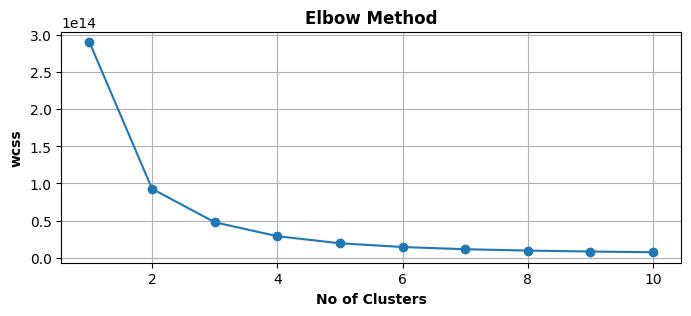

In [61]:
plt.figure(figsize=(8,3))
plt.plot(range(1,11), wcss, marker = 'o')
plt.title('Elbow Method', weight='bold')
plt.xlabel('No of Clusters', weight='bold')
plt.ylabel('wcss', weight='bold')
plt.grid(True)
plt.show()

## Plotting the Silhouette Scores to further investigate and determine the optimal number of clusters (K)

In [63]:
from sklearn.metrics import silhouette_score

In [ ]:
S_Score = []
for k in range(2,11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    S_Score.append(silhouette_score(X, model.labels_))

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(range(2,11), S_Score, marker = 'o')
plt.title('Silhouette Scores', weight='bold')
plt.xlabel('No of Clusters', weight='bold')
plt.ylabel('Silhouette Scores', weight='bold')
plt.grid(True)
plt.show()